## Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Data17.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
 housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283703,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704266,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

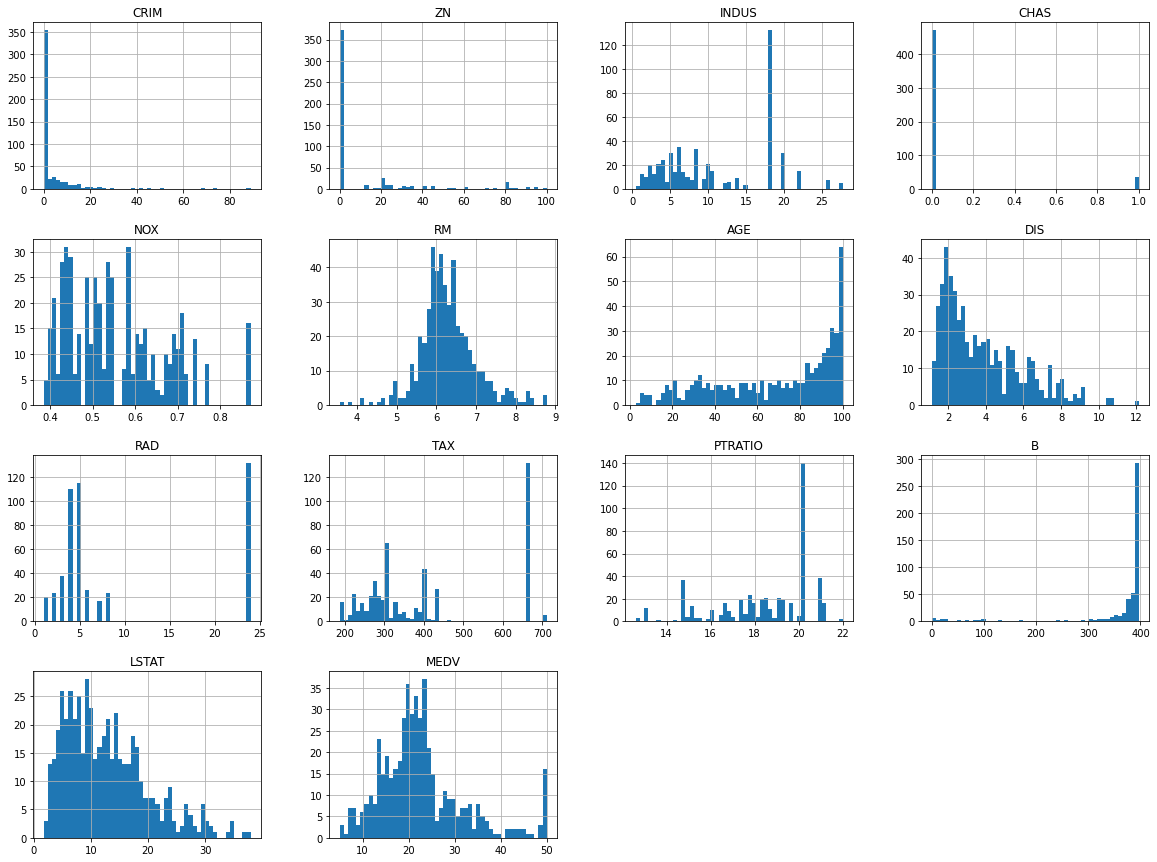

In [8]:
housing.hist(bins=50, figsize=(20, 15))

## Train - test splitting

In [9]:
## wrote mannualy for learning
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) *test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing,0.2)


[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [11]:
## for learning purpose
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



In [12]:
## train test function present in sklearn only 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
## now after spliting our main task is that we must work only with training data hence
## now we work only with traing data not with testing it is for the future use.


In [18]:
housing = strat_train_set.copy()

## Looking for Correlations

In [19]:
corr_matrix = housing.corr()

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679573
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

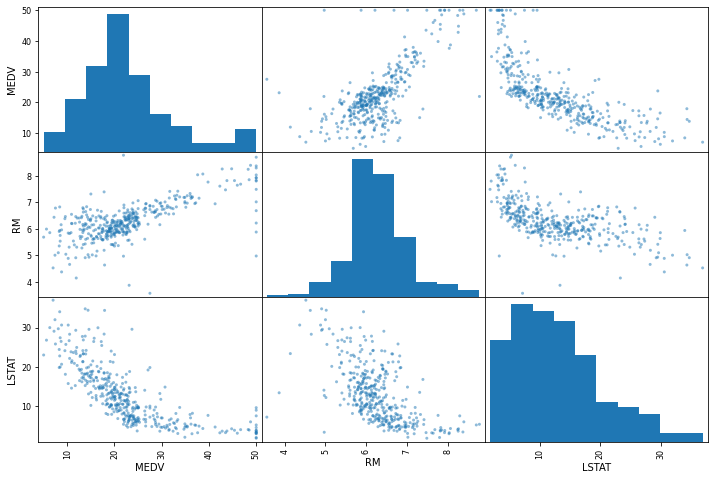

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "LSTAT"]
scatter_matrix(housing[attributes],figsize= (12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

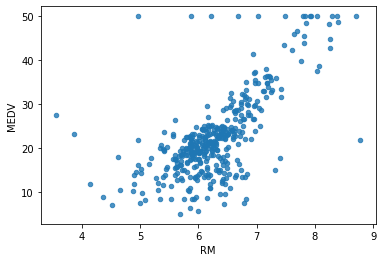

In [22]:
## alpha =0.8 is for the darkness of curve
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out attribute combinations

In [23]:
## here we will try out differnt combinatons and try to make a new attributes from it
## this attribute is made from divison between tax and ram
housing["TAXRM"] = housing['TAX']/housing['RM']

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
## this give us our relationship of our new attribute with medve and all it shows that our new attribute taxrm is -vely correlated here.
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679573
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524941
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

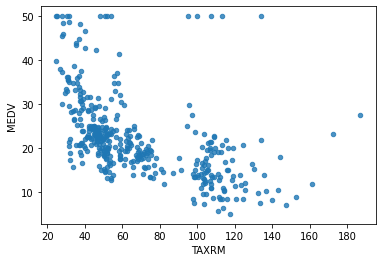

In [26]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [27]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## missing attributes

In [28]:
## here we deleted some of the values from our perfect data set from rm to see what to do what happens when data is missing.

In [29]:
# to care of missing attributes, you have 3 options:
# 1. get rid of the missing data points
# 2. get rid of the whole attribute
# 3. set the value to some value( zero, mean or median)

In [30]:
a = housing.dropna(subset=["RM"]) #option 1
a.shape
#this is option 1 here we droped the data which has missing values in it since we deleted 5 data from 506 hence it must give 506-5=501 entries 

(400, 13)

In [31]:
## so here we droped off all the data which was missing.
housing.dropna(subset=["RM"]) #option 1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [32]:
housing.drop("RM", axis=1).shape # Option 2
# note that there is no RM column and also note that the original housing dataframe will remain unchanged. so 15-1 =14 coloumn bcs 1 of RM is deleted.

(404, 12)

In [33]:
median = housing["RM"].median()
# compute median for option 3

In [34]:
housing["RM"].fillna(median) #option 3
# Note that the orignal hiusing dataframe will remain unchanged
# Means here we filled median in all the places where the data was missing.

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [35]:
housing.shape
# here the length of data remain unchanged we just filled median in place of missin data.

(404, 13)

In [36]:
housing.describe() # before we started filling data from impute.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278693,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715118,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [37]:
# so here what we did manually can also be done directly from the library of sklearn
# here we can import imputer and directly fill all the missing values.

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
# so here it compute all the missing values of every row if present.

SimpleImputer(strategy='median')

In [39]:
housing_= housing.replace('[^\d.]','',regex=True).astype(float)

In [40]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_medain = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [41]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [42]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [43]:
x=housing

In [44]:
housing_tr = pd.DataFrame(x, columns=housing.columns)

In [45]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278693,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715118,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects

1. Estimators- it estimates some parameter based on a dataset.Eg.imputer. it has a fit method and transform method. fit method- Fits the dataset and calculates internal parameters

2. Transformers- transform method takes input and returns output based on the learnings from fit(). it also has a convience function called fit_transform() which fits and then transform.

3. Predictors- LinearRegression model is an example of predictor.fit() and predict() are two common functions. it also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
    
1. Min-max scaling ( Normalization)
    formula = (value - min)/(max - min)
    its value is always between 0 and 1.
    sklearn provides a class called MinMaxScaler for this
  
2. standardization
    formula = (value - mean)/std
    sklearn provides a class called standardScaler for this 
    here output makes std(standard devation) as 1.
    

## Creating a Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #.    ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [47]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [48]:
housing_num_tr
#this gives us a numpy array bcs sikit learn take input as numpy array

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [49]:
housing_num_tr.shape

(404, 13)

In [50]:
# housing_tr is the data frame in which we used imputer while housing is the one in which we did this process manually.

## Selecting a desired model for Dragon Real Estates

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [52]:
some_data = housing.iloc[:5]

In [53]:
some_labels = housing_labels.iloc[:5]

In [54]:
prepared_data = my_pipeline.transform(some_data)

In [55]:
model.predict(prepared_data)
# this model give us an array of predictive data and now we need to check wether this data is even close to correct data or not.

array([23.95751365, 27.21465329, 20.55715424, 25.07472811, 23.7924489 ])

In [56]:
list(some_labels)
# so now we can compare this with our data and see how much accurate we are

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [57]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse = np.sqrt(lin_mse)


In [58]:
lin_mse
# this 4.83 shows or error which is very high this means our model is not perfect and we need to usse some other model for this to reduce the error.

4.830449063708127

In [59]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)


In [60]:
rmse
#lin_mse = rmse

4.830449063708127

## now using decision tree regressor as our model

In [61]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [62]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
mse = np.sqrt(mse)

In [63]:
mse
# now here we see that our error or 'mse' comes out to be '0' and we are very happy with that, but thats not true
# here actuaclly our model gets overfitted and also give us unnesseary data which is not true and not healthy here hence we need not take this hence now we need to aspply cross validation so that we can remove overfitting.

0.0

## Using better evaluation technique - Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)
# cross for decison tree.

In [65]:
rmse_scores
## now here what we see that when we compare the errors before and now we see that the errors which we get are very low compared to our genral one and
## these are also less than what we get linear reggression hence we see that here them decision tree is better than kinear regression since it produce less error here.

array([4.37045355, 4.37680474, 5.27708767, 5.35044708, 3.30571475])

## now applying cross validation on linear regression model to check if we gert some good or new results.

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [67]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

In [68]:
rmse_scores
#these are the rmse scores when we applied cross validation to linear regression.
#so here if we compare to previous rmse scores of linear regression then clearly now this cross validation one is better but the desion tree is more better than the the crosslinear also. 
# so till now also decision tree is the best.

array([4.20576459, 4.53866766, 4.96212871, 6.32279883, 5.27509729])

In [69]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation: ", scores.std())

In [70]:
print_scores(rmse_scores)

scores: [4.20576459 4.53866766 4.96212871 6.32279883 5.27509729]
Mean: 5.060891416274989
Standard deviation:  0.7282867689844639


## so after checking all the models the decision tree model is best since it gives less errors hence we should continue with the decision tree model.

In [71]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

In [73]:
rmse_scores

array([4.35107479, 4.46981647, 5.41412191, 5.50937473, 3.47278707])

In [74]:
## now it would be more benifical if we print mean std and all it will help.

In [75]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation: ", scores.std())

In [76]:
print_scores(rmse_scores)

scores: [4.35107479 4.46981647 5.41412191 5.50937473 3.47278707]
Mean: 4.643434992378102
Standard deviation:  0.7523090315594871


## now if we compare decision tree and linear regression we get :
  decision tree :
  Mean: 4.643434992378102
Standard deviation:  0.7523090315594871

  linear regeression :
   Mean: 5.060891416274989
Standard deviation:  0.7282867689844639


so here we see that mean of decision tree is less than that of mean of linear regression hence decision tree is the best model here.

 

## now we compared decision tree and linear one
## so now we are focusing on some new models and this is " Random Forest"

In [77]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

In [79]:
rmse_scores

array([2.78192053, 3.71437151, 3.19358459, 4.20724986, 3.10236827])

In [80]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation: ", scores.std())

In [81]:
print_scores(rmse_scores)

scores: [2.78192053 3.71437151 3.19358459 4.20724986 3.10236827]
Mean: 3.399898951630024
Standard deviation:  0.5027317252709976


## so comparing all the three models:

   comapring decision tree vs linear vs random forest
   
   we get: 
   
   decision tree : Mean: 4.643434992378102 
Standard deviation: 0.7523090315594871
   
   linear regeression :
   Mean: 5.060891416274989
Standard deviation:  0.7282867689844639


   Random forest :
   Mean: 3.399898951630024
Standard deviation:  0.5027317252709976

so after this comparison we see and get that the mean of Random Forest is very low when compared to others hence here we choose random forest as the best model for our prediction and company dragon real states means by using this random forest we would get the maximum profit for the company.
   
   

## Saving the model

In [82]:
## now we are making model to check wether we got our output or model perfect or not.
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the Model from test data

In [83]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.614 11.59  26.252 22.117 18.435 15.19  20.141 14.528 31.588 40.195
 19.899 12.104 24.323 28.158 19.64  10.909 31.455 14.639 23.442 18.35
 19.536 17.643 16.12  22.266 18.494 31.084 16.266 32.478  9.019 33.418
 24.067 21.203 23.391 10.897 21.045 11.359 42.135 24.697 23.351 41.804
 24.157 29.398 20.372 20.895 19.072 33.209 44.094 20.211 20.298 21.448
 20.309 14.46  21.435 15.066 24.963 32.902 43.052 28.473 19.38  20.822
 47.336 10.088 18.651 25.931 15.127 32.943 19.452 17.825 18.995 34.648
 26.593 23.207 21.384 22.714 35.507 12.863 15.906 19.914 21.185 21.453
 22.569 21.468 14.332 23.005 20.59  21.716 14.324 21.108 21.996 23.306
 18.675 26.743  7.174 25.78  19.384 29.912 19.071 31.874 14.587 26.139
 21.201 19.963] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [84]:
## now here from above we can easily check our differnces of model from the data set like:
## its 24.6 and our model give 16.5 for 1st, for 2nd it is 11.5 and our model give 10.2
## thats how we compare our model easily here.

In [85]:
final_rmse
##from this we see that our final predictions value of rmse is aslo very less and perfect here.

2.843145070543684

In [86]:
prepared_data[0]
# this will give us the array of features.
# we prepared it so that we can check it for working on others.

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23921444, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

Now we finally Trained and test our model here and its working well so now we would try to apply it on some features and try to predict the price of the land from the features.

## Using the Model

In [87]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')
# now here we import our model directly importing model means now we dont need to run its code eniterly again it will be saved in the note book.

In [88]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23921444, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)
# now here we passed the features here randomly and from this we get its correct predicted value for the given array(features).
# this array 22.462 is the value of predicted price from yhe given array.

array([22.462])

Now here we finally completed our eniter model for the Dragon real esates here :
here we did
1. taring model
2. testing model
3. usage application of the model

here we made model test differnt algorithms on it and and finally find the predictions for the given features 

##                                **** COMPLETED ****